# Task 2: Prediction using Decision Tree Algorithm : ( INTERMEDIATE LEVEL TASK)
# By : Paras Rawat

# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [ ]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## Data Summary 

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Data Visualization

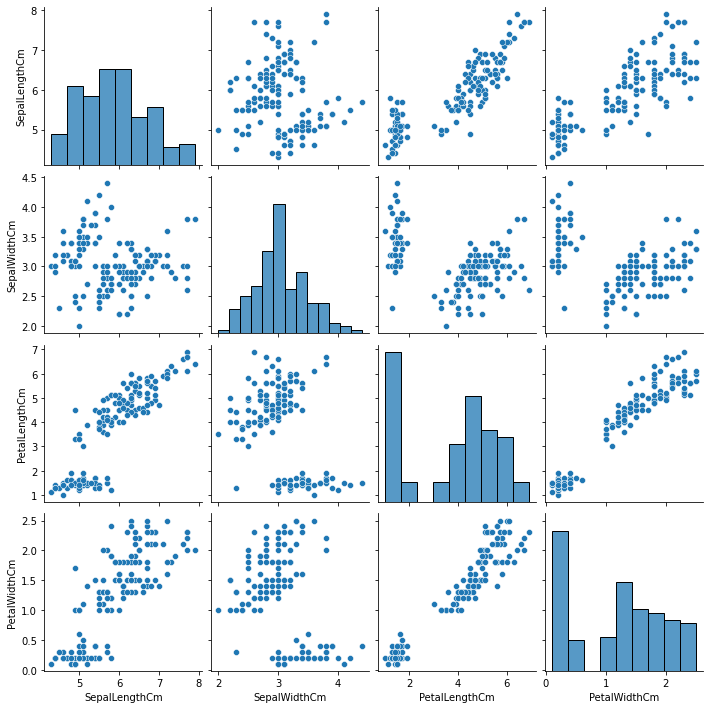

In [ ]:
#Pairplot
sns.pairplot(df.iloc[:,1:])

Text(0.5, 1.0, 'Percentage Of Different Species.')

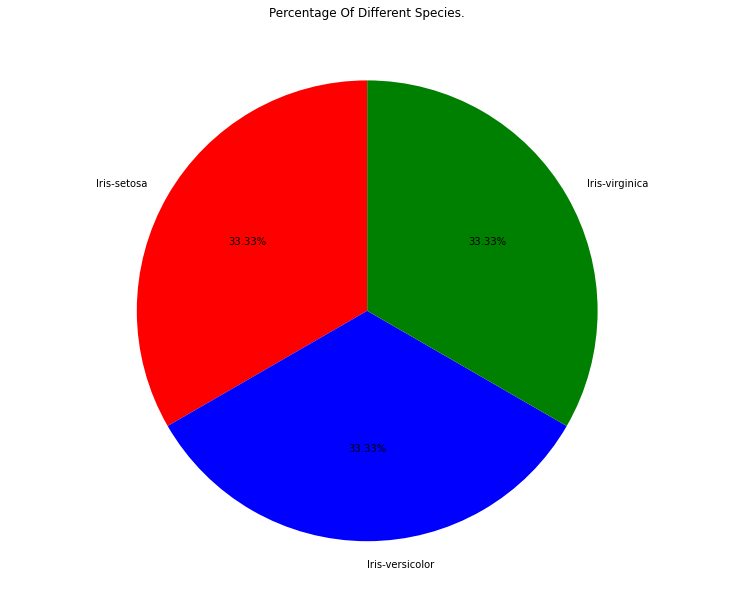

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0,0,1,1])
ax.axis("equal")
colors=["red","blue","green"]
sp=df["Species"].unique()
ct=df["Species"].value_counts().tolist()
ax.pie(ct,labels=sp,autopct="%1.2f%%",colors=colors,startangle=90)
plt.title("Percentage Of Different Species.")

## Identify Outliers

<AxesSubplot:>

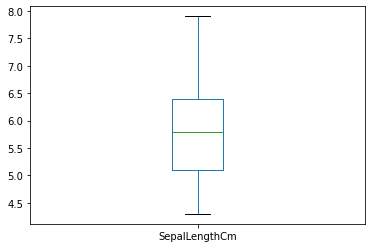

In [ ]:
df["SepalLengthCm"].plot.box()

<AxesSubplot:>

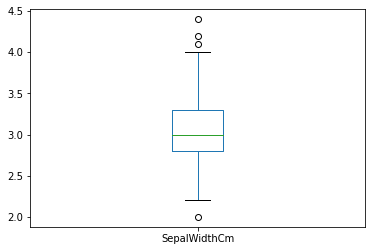

In [ ]:
df["SepalWidthCm"].plot.box()

<AxesSubplot:>

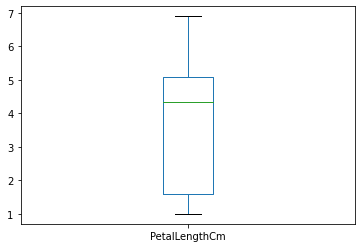

In [ ]:
df["PetalLengthCm"].plot.box()

<AxesSubplot:>

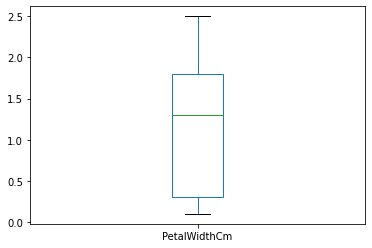

In [ ]:
df["PetalWidthCm"].plot.box()

In [ ]:
#Treating Outliers Found In SepalWidthCm Column Using Flooring And Capping Method

q1=df["SepalWidthCm"].quantile(0.25)
q3=df["SepalWidthCm"].quantile(0.75)

IQR = q3-q1

whisker_width = 1.5

upper_whisker = q3+(whisker_width*IQR)
lower_whisker = q1-(whisker_width*IQR)

df['SepalWidthCm']=np.where(df['SepalWidthCm']>upper_whisker,upper_whisker,
                            np.where(df['SepalWidthCm']<lower_whisker,lower_whisker,df['SepalWidthCm']))

<AxesSubplot:>

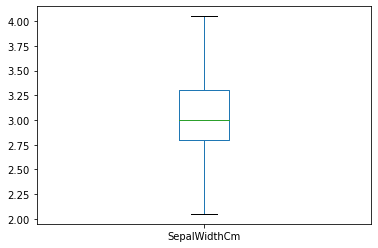

In [ ]:
df["SepalWidthCm"].plot.box()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Species"]=le.fit_transform(df["Species"])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [ ]:
x=df.drop(["Species","Id"],axis=1)
y=df["Species"]


In [ ]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

## Data Training

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
y_train.value_counts()/len(y_train)

1    0.352381
0    0.323810
2    0.323810
Name: Species, dtype: float64

In [ ]:
y_test.value_counts()/len(y_test)

0    0.355556
2    0.355556
1    0.288889
Name: Species, dtype: float64

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

DTC = DecisionTreeClassifier()

In [ ]:
#Fitting Data
model=DTC.fit(x,y)
print(model)

DecisionTreeClassifier()


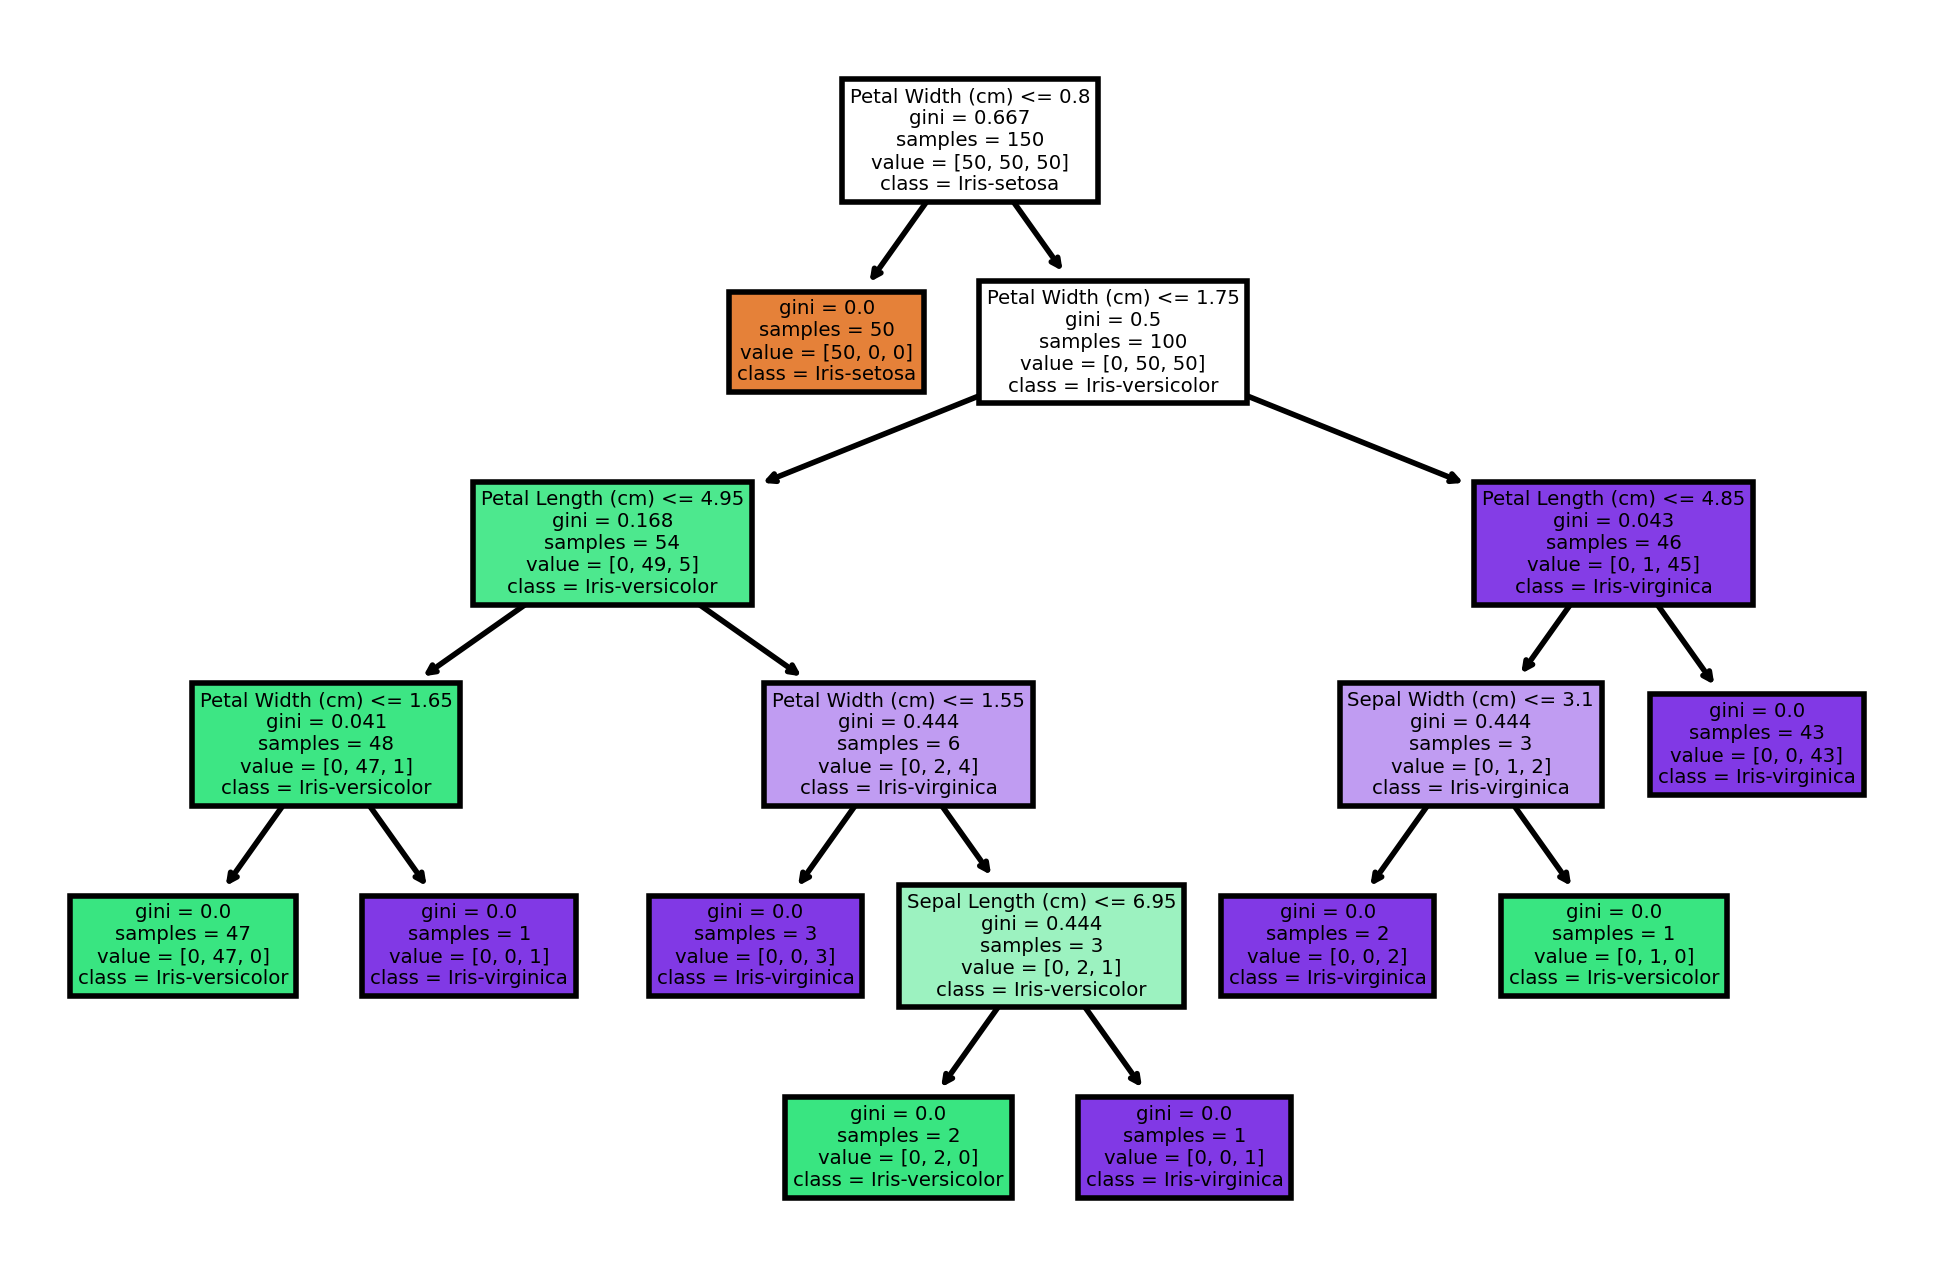

In [ ]:

#loading the tree

features = ['Sepal Length (cm)','Sepal Width (cm)','Petal Length (cm)','Petal Width (cm)']
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, dpi = 400)

tree.plot_tree(DTC.fit(x,y), feature_names = features, class_names = class_names, filled = True);

In [ ]:
#Fitting Data On Training Data
DTC.fit(x_train,y_train)
DTC.fit

<bound method DecisionTreeClassifier.fit of DecisionTreeClassifier()>

In [ ]:
#Checking For the Score For Training Data
DTC.score(x_train,y_train)

1.0

In [ ]:
#Checking For the Score For Testing Data
DTC.score(x_test,y_test)

0.9777777777777777

In [ ]:
#Pridiction of Training Data
DTC.predict(x_train)

array([1, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0,
       1, 2, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 2, 2, 2, 1,
       0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0,
       2, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 1, 1, 2, 2, 0,
       0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 2, 2, 0, 0, 0, 2])

In [ ]:
#Pridiction of Testing Data
DTC.predict(x_test)

array([0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 1,
       2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2,
       0])

In [ ]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  97.77777777777777
